# Main Aim
To create a model which can accurately predict the popularity of a song or a track

# Step 1: Understanding the Problem

The goal of this project is to build a machine learning model that predicts the popularity of a song based on information related to the artist and the album. The assumption is that factors such as an artist’s popularity, follower count, and album characteristics (e.g., number of tracks) have a measurable influence on how popular a track becomes.

To address this problem, a Random Forest Regressor was trained, as it is capable of capturing non-linear relationships and interactions between features that simpler linear models may fail to learn.

It is important to note that this approach is based on historical patterns in the data. There are known exceptions where songs by relatively unknown or non-mainstream artists become highly popular due to external factors such as viral trends, social media exposure, or cultural events. These factors are not explicitly captured in the dataset and therefore are not modeled here.

Consequently, the model’s predictions should be interpreted as trend-based estimates rather than exact forecasts.

The dataset used for this task must contain features such as artist popularity, artist followers, album-level information, and track-level popularity metrics in order for the model to learn meaningful patterns.

# Step - 2: Gathering the Data
We will be using a publicly available dataset present on kaggle  -
https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025/data

It is a reliable and quality data, hence we don't need to worry about gathering data.

# Step - 3: Exploring and Visualizing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Songs.csv")
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,09-11-2009,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,13-01-2023,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),09-04-2021,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,30-07-2021,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,01-01-2010,13,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60.0,626733.0,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,30-06-1959,15,album
17356,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61.0,626733.0,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,30-06-1959,15,album
17357,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27.0,18184.0,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,11-02-1959,9,compilation
17358,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44.0,333376.0,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,01-01-1958,12,album


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            17360 non-null  object 
 1   track_name          17358 non-null  object 
 2   track_number        17360 non-null  int64  
 3   track_popularity    17360 non-null  int64  
 4   explicit            17360 non-null  bool   
 5   artist_name         17353 non-null  object 
 6   artist_popularity   17356 non-null  float64
 7   artist_followers    17356 non-null  float64
 8   artist_genres       13995 non-null  object 
 9   album_id            17360 non-null  object 
 10  album_name          17358 non-null  object 
 11  album_release_date  17360 non-null  object 
 12  album_total_tracks  17360 non-null  int64  
 13  album_type          17360 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 1.7+ MB


In [4]:
df.isnull().sum()

track_id                 0
track_name               2
track_number             0
track_popularity         0
explicit                 0
artist_name              7
artist_popularity        4
artist_followers         4
artist_genres         3365
album_id                 0
album_name               2
album_release_date       0
album_total_tracks       0
album_type               0
dtype: int64

In [5]:
df["artist_genres"].value_counts() # This column requires some data cleaning

artist_genres
[]                                                                                              4492
['soundtrack']                                                                                   346
soundtrack                                                                                       345
pop                                                                                              326
country, pop, indie, folk                                                                        324
                                                                                                ... 
['desi pop', 'bollywood', 'hindi indie', 'desi']                                                   1
egyptian pop, khaleeji                                                                             1
moroccan pop                                                                                       1
french rap, pop urbaine, french r&b, moroccan pop                            

In [6]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks
count,17360.000000,17360.000000,17356.000000,1.735600e+04,17360.000000
mean,5.760887,52.293836,69.843743,2.419656e+07,13.784562
std,6.035031,23.946852,19.588595,3.808461e+07,11.841777
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,1.000000,39.000000,60.000000,4.899595e+05,6.000000
50%,4.000000,58.000000,74.000000,6.141719e+06,13.000000
75%,9.000000,71.000000,84.000000,2.832735e+07,17.000000
max,102.000000,100.000000,100.000000,1.455421e+08,181.000000


In [7]:
most_common_artist = df["artist_name"].mode()[0]
most_common_artist

'Taylor Swift'

In [8]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,09-11-2009,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,13-01-2023,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),09-04-2021,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,30-07-2021,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,01-01-2010,13,album


To visualize the data we need to clean it as well

In [9]:
# Lets check the popularity trend over the years
df["album_release_date"] = df["album_release_date"].astype(str)
df["album_release_date"] = pd.to_datetime(df["album_release_date"], dayfirst=True, errors="coerce")
df["release_year"] = df["album_release_date"].dt.year
df["explicit"] = df["explicit"].map({False: 0, True: 1})

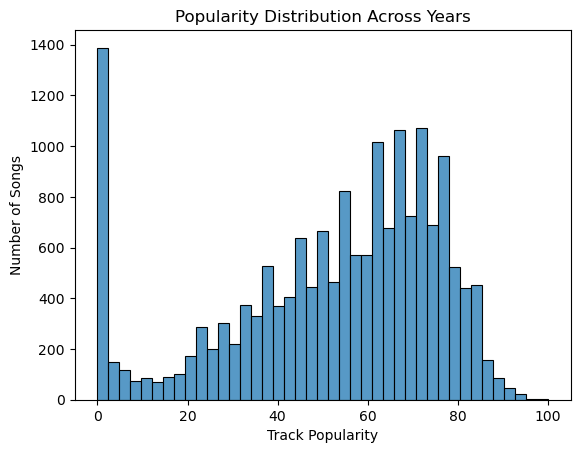

In [10]:
sns.histplot(data=df, x="track_popularity", multiple="stack")
plt.xlabel("Track Popularity")
plt.ylabel("Number of Songs")
plt.title("Popularity Distribution Across Years")
plt.savefig("Pop_distr.jpg")
plt.show()

In [11]:
filtered = df.groupby("release_year")["track_popularity"].count()
bins = filtered.index
releases = filtered.values

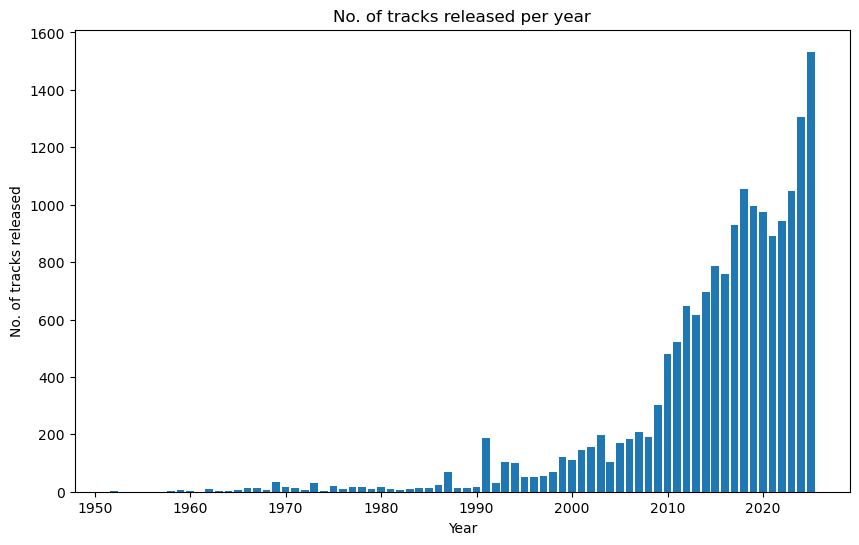

In [12]:
plt.figure(figsize=(10,6))
plt.title("No. of tracks released per year")
plt.xlabel("Year")
plt.ylabel("No. of tracks released")
plt.bar(bins,releases)
plt.savefig("No of tracks released.jpg")
plt.show()

In [13]:
df["album's_tracks"] = pd.cut(df["album_total_tracks"], bins=[0, 5, 10, 15, 20, 25, np.inf], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "25+"])

In [14]:
filtered = df["album's_tracks"].value_counts().sort_index()
ranges = ['0-5', '6-10', '11-15', '16-20', '21-25', '25+']
values = filtered.values

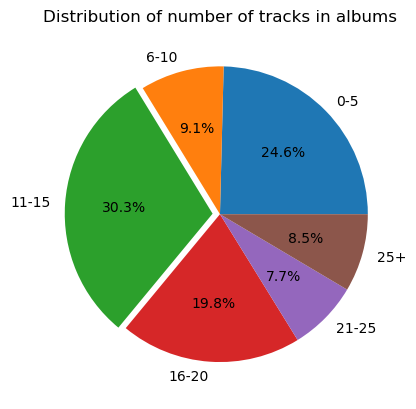

In [15]:
explode = [0,0,0.05,0,0,0]
plt.pie(values, labels=ranges, autopct="%1.1f%%", explode=explode)
plt.title("Distribution of number of tracks in albums")
plt.savefig("Distribution.jpg")
plt.show()

# STEP - 4: Preparing the data

In [16]:
# Doing some simple data cleaning first
df.drop("album's_tracks", axis=1, inplace=True)
df.drop("release_year", axis=1, inplace=True)

In [17]:
df.head()[:3]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,0,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,0,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,0,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album


In [18]:
count = 0
for i in df["artist_genres"] == '[]':
    if i == True:
        count += 1
print(count)

4492


In [19]:
# We will be dropping track_id and track_name as it will not help in song popularity forecasting and also will cause unnecessary work
# We will also be dropping the artist_name column as we are more considered with their popularity and followers rather than their names
df.drop(["track_id", "track_name", "artist_name"], axis=1, inplace=True)

In [20]:
# Dropping album_id and album_name as well
df.drop(["album_id", "album_name"], axis=1, inplace=True)

In [21]:
# We can now move on to the next step and ready our cleaned data for training the model

Data preprocessing

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
# Making a strata
df["release_year"] = df["album_release_date"].dt.year

In [24]:
df.dropna(subset=["release_year"], inplace=True)
df = df[df["release_year"] != 1963.0]
df = df.reset_index(drop=True)

In [25]:
df["artist_genres"] = df["artist_genres"].apply(lambda x: "unknown" if x == '[]' else x)

In [26]:
top_genres = df["artist_genres"].value_counts().nlargest(30).index
df["artist_genres"] = df["artist_genres"].apply(lambda x:x if x in top_genres else 'other')

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["release_year"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [28]:
test_set.to_csv("testing_data.csv",index=False)

Pipeline making

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [30]:
features = train_set.drop(["track_popularity", "album_release_date"], axis=1)
labels = train_set["track_popularity"].copy()

In [31]:
num_attrs = features.drop(["artist_genres", "album_type"], axis=1).columns.to_list()
cat_attrs = ["artist_genres", "album_type"]

In [32]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("impute", SimpleImputer(strategy="median"))
])
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
full_pipeline = ColumnTransformer([
    ("nums", num_pipeline, num_attrs),
    ("cats", cat_pipeline, cat_attrs)
])

In [33]:
prepared_data = full_pipeline.fit_transform(features)

# Step - 5: Selecting the right model and training it

For our dataset Linear Regression model and Random Forest Regressor seems to be the best fit hence we will compare the two models and then we will select the one which gives the best results.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [35]:
test_labels = test_set["track_popularity"].copy()
test_features = test_set.drop("track_popularity", axis=1)
test_data = full_pipeline.transform(test_set)

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, labels)
lin_predicts = lin_reg.predict(test_data)

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, labels)
forest_predicts = forest_reg.predict(test_data)

In [37]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(test_labels, lin_predicts)
forest_rmse = root_mean_squared_error(test_labels, forest_predicts)

print("The rmse of linear regression model is:", lin_rmse)
print("The rmse of Random Forest Regressor model is:", forest_rmse)

The rmse of linear regression model is: 21.232388979094313
The rmse of Random Forest Regressor model is: 14.057751053039114


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
lin_rmses = -cross_val_score(lin_reg, prepared_data, labels, scoring="neg_root_mean_squared_error", cv=10)
forest_rmses = -cross_val_score(forest_reg, prepared_data, labels, scoring="neg_root_mean_squared_error", cv=10)

In [40]:
print(f"For Linear Regression model the rmses are: \n{pd.Series(lin_rmses).describe()}")
print(f"\nFor Random Forest Regressor model the rmses are: \n{pd.Series(forest_rmses).describe()}")

For Linear Regression model the rmses are: 
count    10.000000
mean     20.298224
std       0.375667
min      19.789428
25%      19.985146
50%      20.312067
75%      20.556675
max      20.941220
dtype: float64

For Random Forest Regressor model the rmses are: 
count    10.000000
mean     14.597943
std       0.534707
min      13.565240
25%      14.288735
50%      14.720064
75%      14.920797
max      15.482617
dtype: float64


Hence we will be using the Random Forest Regressor model

# Step - 6 Saving our work and showing the results

Now we will switch to python file named "model.py"
In that file we will save our model and pipeline so we can save the time which is required to retrain the model again and agian when running the code.

In [41]:
predicted_csv = pd.read_csv("Predictions.csv")
testing_set_with_results = pd.read_csv("testing_data.csv")

predicted_csv

,track_number,track_popularity,explicit,artist_popularity,artist_followers,artist_genres,album_release_date,album_total_tracks,album_type,release_year,Predicted_track_popularity
0,1,20,0,9.0,64.0,other,2024-08-16,1,single,2024.0,25.2800
1,3,55,1,93.0,112957721.0,unknown,2012-11-13,30,album,2012.0,68.3300
2,7,57,0,88.0,60804949.0,other,2000-07-10,10,album,2000.0,70.5500
3,1,44,0,52.0,21748.0,['dark r&b'],2025-04-11,3,single,2025.0,44.5650
4,1,24,1,47.0,307529.0,other,2018-01-20,1,single,2018.0,33.3400
...,...,...,...,...,...,...,...,...,...,...,...
3427,1,72,0,85.0,46886554.0,['pop'],2019-10-31,1,single,2019.0,49.6470
3428,2,83,0,78.0,7402824.0,other,1973-11-07,33,album,1973.0,75.1400
3429,1,65,0,78.0,35576126.0,other,2021-07-23,1,single,2021.0,55.0175
3430,2,59,0,85.0,47716988.0,"pop, hip hop, country",2024-08-15,18,album,2024.0,68.9200


In [42]:
testing_set_with_results

,track_number,track_popularity,explicit,artist_popularity,artist_followers,artist_genres,album_release_date,album_total_tracks,album_type,release_year,Predicted_track_popularity
0,1,20,0,9.0,64.0,other,16-08-2024,1,single,2024,25.2800
1,3,55,1,93.0,112957721.0,unknown,13-11-2012,30,album,2012,68.3300
2,7,57,0,88.0,60804949.0,other,10-07-2000,10,album,2000,70.5500
3,1,44,0,52.0,21748.0,['dark r&b'],11-04-2025,3,single,2025,44.5650
4,1,24,1,47.0,307529.0,other,20-01-2018,1,single,2018,33.3400
...,...,...,...,...,...,...,...,...,...,...,...
3427,1,72,0,85.0,46886554.0,['pop'],31-10-2019,1,single,2019,49.6470
3428,2,83,0,78.0,7402824.0,other,07-11-1973,33,album,1973,75.1400
3429,1,65,0,78.0,35576126.0,other,23-07-2021,1,single,2021,55.0175
3430,2,59,0,85.0,47716988.0,"pop, hip hop, country",15-08-2024,18,album,2024,68.9200


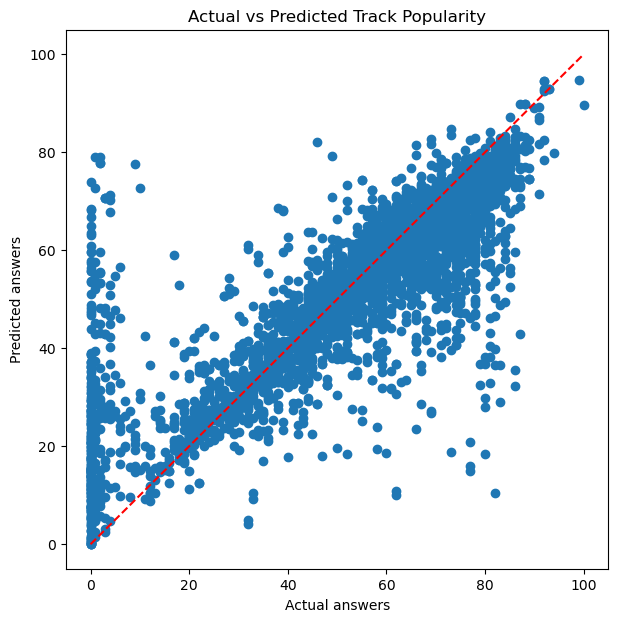

In [48]:
actual = testing_set_with_results["track_popularity"].copy()
results = predicted_csv["Predicted_track_popularity"].copy()

plt.figure(figsize=(7,7))
plt.scatter(actual, results)

min_val = min(actual.min(), results.min())
max_val = max(actual.max(), results.max())

plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.title("Actual vs Predicted Track Popularity")
plt.xlabel("Actual answers")
plt.ylabel("Predicted answers")
plt.savefig("model_accuracy.jpg")
plt.show()